remake plot with polar coordinate proper motion

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import sys
sys.path.insert(0, '/scratch/mathieu/MMPS/SCRIPTS_dirty/')
sys.path.insert(0, '/scratch/mathieu/MMPS/SCRIPTS_dirty/my_script/binaries/binary_c/')
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter, MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatch
from plot_defaults import *
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import aplpy
from termcolor import colored


In [6]:
fname = '/scratch/mathieu/vfts682_data/vfts_obwrstars_data.txt'
src = np.genfromtxt(fname, skip_header=1)

f = open(fname,'r')
for i,line in enumerate(f):
    if i == 0:
        col = line.split()
        col = col[1:]
        print col
        break
f.close()

['VFTS', 'ang_dist', 'pos_ang_star', 'pos_ang_pm', 'ang_r136', 'impact_par', 'relpm', 'pm_error']


In [54]:
VFTS_id = src[:, col.index('VFTS')]
# check if 682 is in there
i682 = np.argmin(np.absolute(VFTS_id-682))
i16 = np.argmin(np.absolute(VFTS_id-16))
i72 = np.argmin(np.absolute(VFTS_id-72))
ang_dist = src[i:, col.index('ang_dist')]
rel_pm = src[:, col.index('relpm')]
e_rel_pm = src[:, col.index('pm_error')]
pos_ang_star = src[:, col.index('pos_ang_star')]
pos_ang_pm = src[:,col.index('pos_ang_pm')]
theta = pos_ang_pm - pos_ang_star


In [55]:
print theta[i682]
print theta[i16]
print theta[i72]

-14.199999999999996
-2.5
20.10000000000001


36 317
Errorbars are random


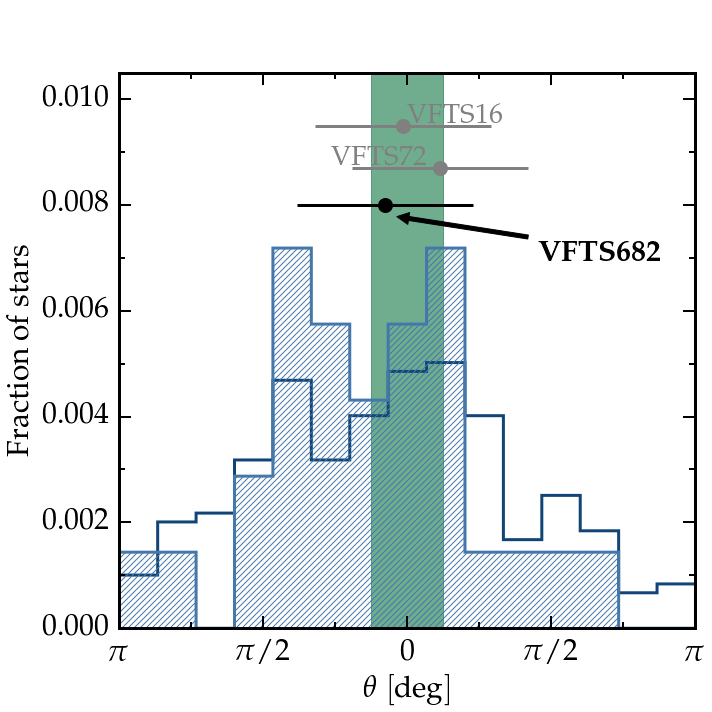

In [67]:
fig = plt.figure(figsize=(10., 10.))
ax = fig.add_subplot(111)
bx=ax.twiny()
ind = e_rel_pm <= 0.05
print np.sum(ind), len(rel_pm)
ax.set_xlim(-180,180)
ax.set_ylim(0,1.05e-2)
BINS = 15

#expectation (-22.5,22.5)
ax.hist(500, bins=BINS, range=(-180,180), color='#117744', alpha=0.6, fill='#117744', label="Expected if ejected from R136")
rectangle = plt.Rectangle((-22.5, 0), 45, max(ax.get_ylim()), color='#117744', zorder=0, alpha=0.6)
ax.add_artist(rectangle)

# nice stars

# 682
ax.errorbar(theta[i682],0.008 ,#  30.5
            xerr=55,color='k',marker='o',ms=15, mew=0, zorder=10)
ax.annotate(r"{\bf VFTS682}", xy=(theta[i682]+3,0.0078), xytext=(120,0.0068),
            arrowprops=dict(facecolor='black', shrink=0.05),transform=ax.transData, va='bottom', ha='center', fontsize=30)

# 72
ax.errorbar(theta[i72],0.0087, xerr=55,color='#808080',marker='o',ms=15, mew=0, zorder=10)
ax.text(theta[i72]-68, 0.00876, r"VFTS72", fontsize=28, color="#808080", transform=ax.transData,zorder=10)

# 16
ax.errorbar(theta[i16],0.0095, xerr=55,color='#808080',marker='o',ms=15, mew=0, zorder=10)
ax.text(theta[i16]+2,0.00956, r"VFTS16", fontsize=28, color="#808080", transform=ax.transData,zorder=10)
print colored("Errorbars are random","red")


ax.hist(theta, bins=BINS, fill=None, edgecolor='#114477', histtype='step', normed=True,
        range=(-180,+180),
        lw=3, label="$\Delta\mu_\mathrm{rel}\leq0.1 \ \mathrm{[mas\ yr^{-1}]}$")

ax.hist(theta[ind], bins=BINS, color='#4477AA', hatch='////',
        fill=None, edgecolor='#4477AA',  histtype='step', normed=True,
        # normed=True,
        range=(-180,+180),
        lw=3, label='$\Delta\mu_\mathrm{rel}\leq0.05 \ \mathrm{[mas\ yr^{-1}]}$')


ax.tick_params(axis='both', which='major', width=2,
               length=12, pad=10, labelsize=30)
ax.tick_params(axis='both', which='minor', width=2,
               length=6, pad=10)

ax.yaxis.set_major_locator(MultipleLocator(2e-3))
ax.yaxis.set_minor_locator(MultipleLocator(1e-3))
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticks([-135,-45,45,135], minor=True)
ax.set_xticklabels(['$\pi$', '$\pi/2$', '$0$', '$\pi/2$', '$\pi$'])



bx.tick_params(axis='both', which='major', width=2,
               length=12, pad=10, labelsize=30, labelcolor='w')
bx.tick_params(axis='both', which='minor', width=2,
               length=6, pad=10)


bx.set_xlim(ax.get_xlim())
bx.set_xticks([-180, -90, 0, 90, 180])
bx.set_xticks([-135,-45,45,135], minor=True)
bx.set_xlabel(r"dummy", color='w', fontsize=30)
bx.set_xticklabels(['$\pi$', '$\pi/2$', '$0$', '$\pi/2$', '$\pi$'])



# l=ax.legend(loc='upper right', fontsize=28, handletextpad=0.5, markerfirst=False,handlelength=0.5)
# l.draw_frame(False)
#ax.set_ylabel('\# stars', fontsize=30)
ax.set_ylabel('Fraction of stars', fontsize=30)
ax.set_xlabel(r'$\theta \ \mathrm{[deg]}$', fontsize=30)

plt.tight_layout()

plt.savefig('/scratch/mathieu/PLOTS_TMP/angle.pdf')

36 317


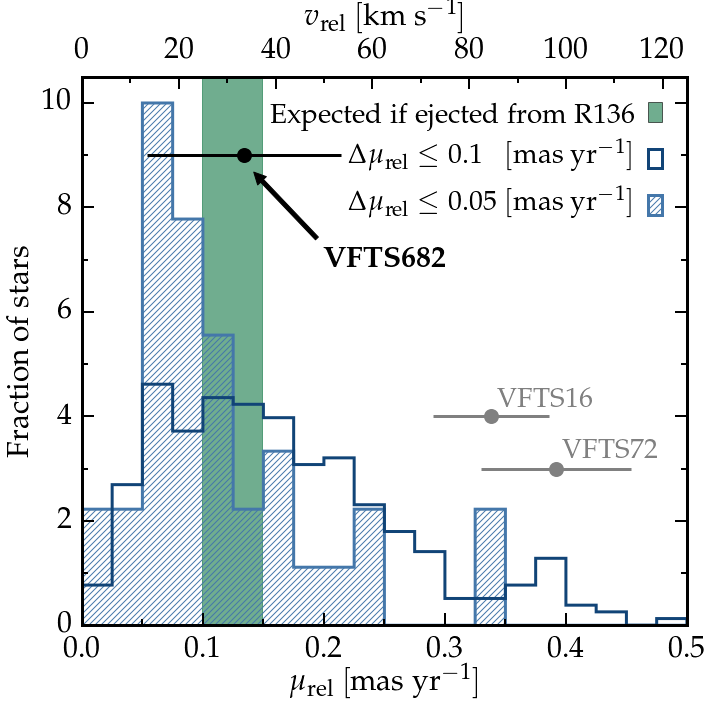

In [68]:
fig = plt.figure(figsize=(10., 10.))
ax = fig.add_subplot(111)
bx=ax.twiny()
ax.set_xlim(0, 0.5)
ax.set_ylim(ymin=0,ymax=10.5)

ind = e_rel_pm <= 0.05
print np.sum(ind), len(rel_pm)

ax.hist(1.1, color='#117744', alpha=0.6, fill='#117744', label="Expected if ejected from R136")
ax.errorbar(rel_pm[i682],9, xerr=0.08,color='k',marker='o',ms=15, mew=0)
ax.annotate(r"{\bf VFTS682}", xy=(rel_pm[i682]+0.005,8.75), xytext=(0.25,7),
            arrowprops=dict(facecolor='black', shrink=0.05),transform=ax.transData, va='center', ha='center', fontsize=30)

ax.errorbar(rel_pm[i16],4, xerr=e_rel_pm[i16],color='#808080',marker='o',ms=15,mew=0)
ax.text(rel_pm[i16]+0.005,4.2, r"VFTS16", fontsize=28, color="#808080", transform=ax.transData)

ax.errorbar(rel_pm[i72],3, xerr=e_rel_pm[i72],color='#808080',marker='o',ms=15,mew=0)
ax.text(rel_pm[i72]+0.005,3.2, r"VFTS72", fontsize=28, color="#808080", transform=ax.transData)


BINS = 20

NN,BB,PP=ax.hist(rel_pm, bins=BINS, # hatch='\\',
        fill=None, edgecolor='#114477', histtype='step',
        normed=True,
        range=ax.get_xlim(), lw=3, label="$\Delta\mu_\mathrm{rel}\leq0.1\phantom{0} \ \mathrm{[mas\ yr^{-1}]}$", zorder=10)
ax.hist(rel_pm[ind], bins=BINS,color='#4477AA', hatch='////',
        fill=None, edgecolor='#4477AA',  histtype='step',
        normed=True,
        range=ax.get_xlim(), lw=3, label='$\Delta\mu_\mathrm{rel}\leq0.05 \ \mathrm{[mas\ yr^{-1}]}$')

min_mu = (119.4/0.8e6)*1000
max_mu = (119.4/1.2e6)*1000

rectangle = plt.Rectangle((min_mu, 0), max_mu-min_mu, max(ax.get_ylim()), color='#117744', zorder=0, alpha=0.6)
ax.add_artist(rectangle)

ax.tick_params(axis='both', which='major', width=2,
               length=12, pad=10, labelsize=30)
ax.tick_params(axis='both', which='minor', width=2,
               length=6, pad=10)

bx.tick_params(axis='both', which='major', width=2,
               length=12, pad=10, labelsize=30)
bx.tick_params(axis='both', which='minor', width=2,
               length=6, pad=10)


ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

l=ax.legend(loc='upper right', fontsize=28, handletextpad=0.5, markerfirst=False,handlelength=0.5)
l.draw_frame(False)

bx.set_xlim(0,5*25)
bx.xaxis.set_major_locator(MultipleLocator(20))
bx.xaxis.set_minor_locator(MultipleLocator(10))
bx.set_xlabel(r"$v_\mathrm{rel} \ [\mathrm{km\ s^{-1}}]$",fontsize=30)




#ax.set_ylabel('\# stars', fontsize=30)
ax.set_ylabel('Fraction of stars', fontsize=30)
ax.set_xlabel('$\mu_\mathrm{rel} \ \mathrm{[mas\ yr^{-1}]}$', fontsize=30)
plt.tight_layout()

plt.savefig('/scratch/mathieu/PLOTS_TMP/dist_mu_region.pdf')

In [69]:
bin_size = BB[1]-BB[0]
sum = 0
for n in NN:
    sum+=n*bin_size
print sum

1.0


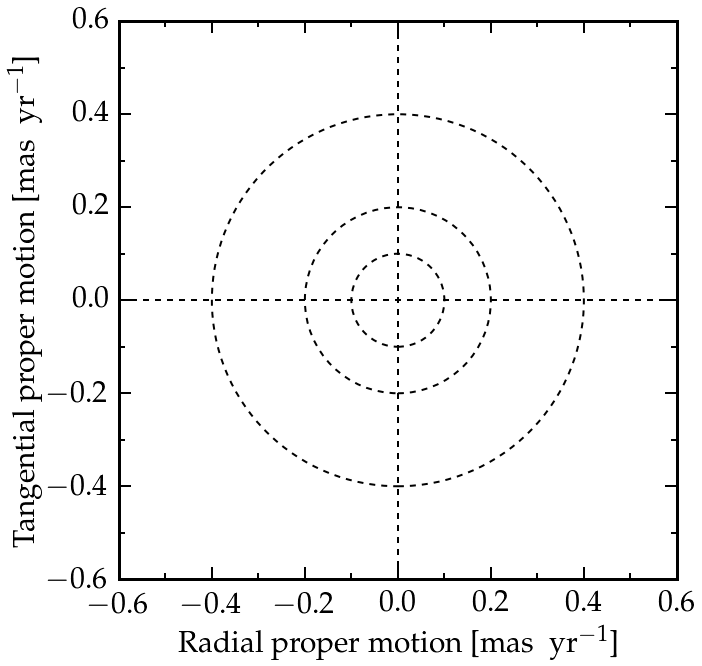

In [14]:
# make plot
fig = plt.figure(figsize=(10., 10.))
ax = fig.add_subplot(111)

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(ax.get_xlim())
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.tick_params(axis='both', which='major', width=2,
               length=12, pad=10, labelsize=30)
ax.tick_params(axis='both', which='minor', width=2,
               length=6, pad=10)

ax.axvline(0, 0,1,ls='--',lw=2,color='k')
ax.axhline(0, 0,1,ls='--',lw=2,color='k')

circle1 = plt.Circle((0, 0), 0.1, edgecolor='k', ls='--', lw=2, zorder=0, fill=False)
circle2 = plt.Circle((0, 0), 0.2, color='k', ls='--', lw=2, zorder=0, fill=False)
circle3 = plt.Circle((0, 0), 0.4, color='k', ls='--', lw=2, zorder=0, fill=False)

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)



ax.set_xlabel("Radial proper motion [mas \ yr$^{-1}$]", fontsize=30)
ax.set_ylabel("Tangential proper motion [mas \ yr$^{-1}$]", fontsize=30)